In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt


%pylab inline

import os
from scipy.misc import imread
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from __future__ import print_function
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras


Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [3]:
root_dir = os.path.abspath('../..')

# check for existence
print(os.path.exists(root_dir))
print(root_dir)



data_dir = os.path.join(root_dir,'Analytics Vidya Identify the digits','Identify the Digits')
print(os.path.exists(data_dir))
print(data_dir)

sub_dir = os.path.join(data_dir,'sub') 
print(os.path.exists(sub_dir))
print(sub_dir)

True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\2_Deep_Learning_With_Convolution_Networks
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\2_Deep_Learning_With_Convolution_Networks\Analytics Vidya Identify the digits\Identify the Digits
True
C:\Users\Dinesh\Desktop\Deep-Learning-with-keras\2_Deep_Learning_With_Convolution_Networks\Analytics Vidya Identify the digits\Identify the Digits\sub


In [4]:

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [5]:
train = pd.read_csv(os.path.join(data_dir,'data','Train', 'train.csv')) # filename,labels
train.head(n=5)

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [6]:
test = pd.read_csv(os.path.join('test.csv')) # filename
test.head(n=5)

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [7]:
sample_submission = pd.read_csv(os.path.join('Sample_Submission.csv')) # sample submission file

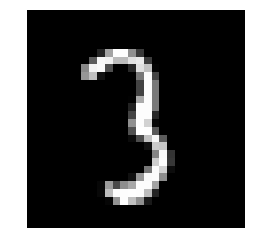

In [8]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'data', 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [11]:

temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir,'data',  'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img
    temp.append(img)
    
train_x = np.stack(temp)


In [13]:
train_x /= 255.0 
print(train_x.shape)

(49000, 28, 28)


In [14]:

# train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir,'data',  'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
# test_x = test_x.reshape(-1, 784).astype('float32')

In [15]:
print(test_x.shape)

(21000, 28, 28)


In [20]:
train_x = train_x[:, np.newaxis, :, :]
test_x = test_x[:,np.newaxis,:,:]

print(train_x.shape)
print(test_x.shape)

(49000, 1, 28, 28)
(21000, 1, 28, 28)


In [21]:
K.set_image_dim_ordering("th")

In [22]:

#  Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

train_y = np_utils.to_categorical(train.label.values) #labels

In [35]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)


In [36]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential() # Sequential model
     
        # CONV => RELU => POOL
        
        model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
        # 20 ->  Convolutional kernel
        # kernel_size = 5 --> Specify the value of spatial dimensions.
        # padding ='same' --> We have an output same size as the input.
        # input_shape --> input shape of the image
        
        model.add(Activation("relu"))
        # Activation --> Relu
        
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # pool_size = (2,2) --> Represents factors in which the image is vertically and horizontally downscaled.
        
       
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        
        
        # Flatten => RELU layers   
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [37]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
metrics=["accuracy"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`


In [ ]:
history = model.fit(train_x, train_y,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 39200 samples, validate on 9800 samples
Epoch 1/20
39200/39200 [==============================] - 343s 9ms/step - loss: 0.2034 - acc: 0.9394 - val_loss: 0.0624 - val_acc: 0.9814
Epoch 2/20
39200/39200 [==============================] - 381s 10ms/step - loss: 0.0512 - acc: 0.9837 - val_loss: 0.0569 - val_acc: 0.9822
Epoch 3/20
39200/39200 [==============================] - 378s 10ms/step - loss: 0.0342 - acc: 0.9883 - val_loss: 0.0474 - val_acc: 0.9860
Epoch 4/20
39200/39200 [==============================] - 348s 9ms/step - loss: 0.0254 - acc: 0.9918 - val_loss: 0.0549 - val_acc: 0.9827
Epoch 5/20
39200/39200 [==============================] - 351s 9ms/step - loss: 0.0180 - acc: 0.9938 - val_loss: 0.0391 - val_acc: 0.9890
Epoch 6/20
39200/39200 [==============================] - 336s 9ms/step - loss: 0.0150 - acc: 0.9954 - val_loss: 0.0444 - val_acc: 0.9873
Epoch 7/20
39200/39200 [==============================] - 337s 9ms/step - loss: 0.0113 - acc: 0.9959 - val_loss: 0.0464 -

In [34]:
pred = model.predict_classes(test_x)
sample_submission.filename = test.filename; sample_submission.label = pred
sample_submission.to_csv(os.path.join(sub_dir, 'fianl_prediction.csv'), index=False)

21000/21000 [==============================] - 49s 2ms/step
